## Simulating any compartmental model using the `Model` class

In the present notebook, we show how any compartmenal models can be simulated using the `pyross.stochastic.Model` class. We allow users to specify any number of epidemiological classes, as well as any linear or infectious coupling between them.

In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

### The SIR model

Below you will find the model-specification dictionary for the SIR model with some constant injection into the S class:

In [2]:
model_spec = { "classes" : ["S", "I"],

             "S" : {
                    "constant"  : [ ["k"] ], 
                    "infection" : [ ["I","S", "-beta"] ]},  ## the I class passes infection to S class
             "I" : { "linear"    : [ ["I", "-gamma"] ],     ## this is recovery process for I class
                    "infection" : [ ["I", "S", "beta"]]}    
             
              ## the recovered class R is internally determined by number conservation
             }

Next, we define the parameter values:

In [3]:
parameters = {
    'beta' : 0.1,
    'gamma' : 0.1, 
    'k' : 1, 
}

The initial conditions can be defined in either of two ways. They can either be defined using a dictionary, where for each model class we have a corresponding 1D array of length $M$ (where $M$ is the number of age-groups), or a numpy array. The numpy array must have dimensions $M \times (d-1)$, where $d$ is the number of model classes (so 3 for SIR, for example).

If the initial conditions are provided as a dictionary, we are free to leave out one of the classes. In which case the initial conditions of the left out class will be inferred from the others.

In [4]:
M = 3                
Ni = 1000*np.ones(M)
N = np.sum(Ni) 


# Initial conditions as an array
x0 = np.array([
    999, 1000, 1000, # S
    1,   0,    0,    # I
])

# Or initial conditions as a dictionary 
I0 = [10, 10, 10]
S0 = [n-20 for n in Ni]

x0 = {
    'S' : S0,
    'I' : I0 
}

CM = np.array([
    [1,   0.5, 0.1],
    [0.5, 1,   0.5],
    [0.1, 0.5, 1  ]
], dtype=float)

def contactMatrix(t):  
    return CM

# duration of simulation and data file
Tf = 160;  Nf=Tf+1; 

model = pyross.stochastic.Model(model_spec, parameters, M, Ni)
# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

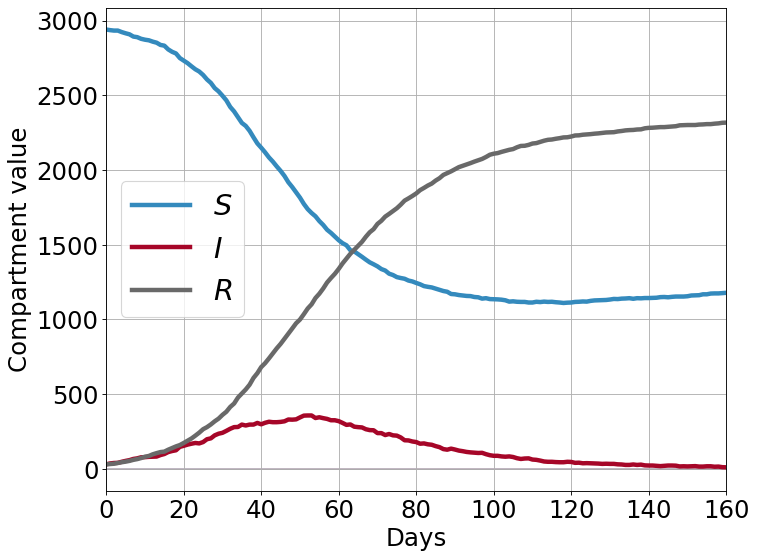

In [5]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I, '-', color='#A60628', label='$I$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');

We can use `pyross.stochastic.Model.update_model_parameters` to change the parameters from what we set them initially:

In [6]:
parameters = {
    'beta' : 0.1,
    'gamma' : 0.01,
    'k':1
}

model.update_model_parameters(parameters)

# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

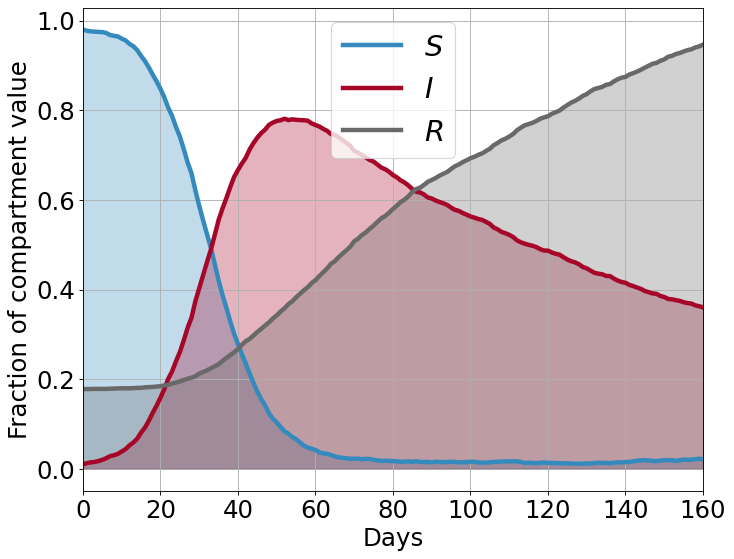

In [7]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
I = np.sum(model.model_class_data('I', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, I/N, color='#A60628', alpha=0.3)
plt.plot(t, I/N, '-', color='#A60628', label='$I$', lw=4)

plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Fraction of compartment value')
plt.xlabel('Days');